# Pandas: calculate moving averages and rolling windows

## Setup

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(9,6)})

In [2]:
# Read sample data with date index
df = pd.read_csv('data/finance_data.csv', parse_dates=['Date'])
df = df.set_index('Date')['2019-09':].loc[lambda x: x['Name'] == 'Nasdaq100', 'Value']
df

Date
2019-09-03    7609.51
2019-09-04    7719.25
2019-09-05    7862.54
2019-09-06    7852.54
2019-09-09    7832.40
               ...   
2020-05-04    8834.11
2020-05-05    8930.62
2020-05-06    8984.86
2020-05-07    9101.88
2020-05-08    9220.35
Name: Value, Length: 173, dtype: float64

## Moving averages

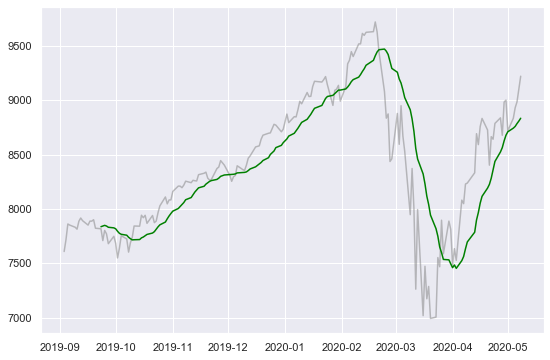

In [3]:
# Moving average over the last 15 days
mavg = df.rolling(15).mean()

# Plot result
sns.lineplot(data=df, alpha=0.5, color='grey')
sns.lineplot(data=mavg, color='green');

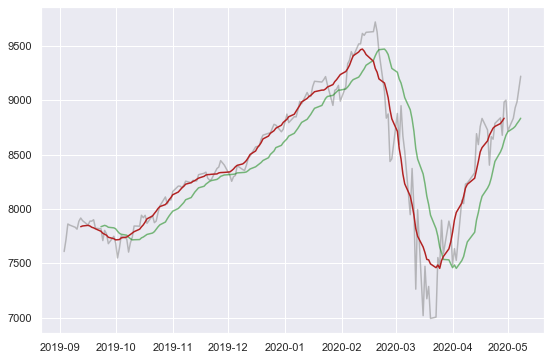

In [4]:
# Centered moving average
mavg_ctd = df.rolling(15, center=True).mean()

# Plot result
sns.lineplot(data=df, alpha=0.5, color='grey')
sns.lineplot(data=mavg, alpha=0.5, color='green')
sns.lineplot(data=mavg_ctd, color='firebrick');

## Rolling windows for any calculation

While moving averages are useful for time series, `rolling()` can be associated with a number of other calculations, like sum, count, min or max, etc.

In [5]:
df.rolling(5).sum()

Date
2019-09-03         NaN
2019-09-04         NaN
2019-09-05         NaN
2019-09-06         NaN
2019-09-09    38876.24
                ...   
2020-05-04    44213.16
2020-05-05    44466.18
2020-05-06    44468.28
2020-05-07    44569.65
2020-05-08    45071.82
Name: Value, Length: 173, dtype: float64

In [6]:
df.rolling(5).count()

Date
2019-09-03    1.0
2019-09-04    2.0
2019-09-05    3.0
2019-09-06    4.0
2019-09-09    5.0
             ... 
2020-05-04    5.0
2020-05-05    5.0
2020-05-06    5.0
2020-05-07    5.0
2020-05-08    5.0
Name: Value, Length: 173, dtype: float64

In [7]:
df.rolling(5).min()

Date
2019-09-03        NaN
2019-09-04        NaN
2019-09-05        NaN
2019-09-06        NaN
2019-09-09    7609.51
               ...   
2020-05-04    8677.60
2020-05-05    8718.18
2020-05-06    8718.18
2020-05-07    8718.18
2020-05-08    8834.11
Name: Value, Length: 173, dtype: float64